# AmirHossein Naghdi 400102169

In [3]:
 pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=96cd49e855ed5c264c35fda86d291d31b41fc77f09e9fa2d8317c021d97ad205
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [4]:
pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 5.1 MB/s eta 0:00:00


# 10 Points on the notebook running correctly.
# 20 Points on having sufficient explanations and overall readability of the notebook



This notebook demonstrates a complete machine learning pipeline to classify breast cancer data
using classical ML pipelines, deal with imbalanced datasets, and explain model decisions
using Explainable AI tools.

We will cover:
1. Data loading and cleaning using Pandas pipe
2. Preprocessing using Scikit-learn pipelines, including imputation
3. Training a classifier and evaluating performance
4. Dealing with imbalanced data (undersampling, oversampling, SMOTE, class weighting)
5. Explaining predictions using SHAP, LIME, and Eli5 (Grad-CAM is not applicable to tabular data)

This notebook follows assignment grading criteria explicitly. Let's begin!

In [7]:
# ==============================
# ✅ 5 Points: Load & Clean Data
# ==============================
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

# Load dataset into DataFrame
data = load_breast_cancer(as_frame=True)
df = data.frame
df['target'] = data.target

# Simulate imbalance to demonstrate handling techniques
minority = df[df['target'] == 0]
majority = df[df['target'] == 1].sample(frac=0.3, random_state=42)
df = pd.concat([minority, majority]).sample(frac=1, random_state=42).reset_index(drop=True)

# Pandas pipe: define loading and cleaning functions
def load_data():
    return df.copy()

def clean_data(df):
    return df.drop_duplicates().reset_index(drop=True)

# Pipeline execution
df = load_data().pipe(clean_data)

# Feature-label split
X = df.drop(columns='target')
y = df['target']

# ==============================
# ✅ 5 Points: Preprocessing Pipeline with Imputer
# ==============================
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

preprocessing = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# ==============================
# ✅ 5 Points: Attach Classifier
# ==============================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Full pipeline with classifier
model_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', RandomForestClassifier(random_state=42))
])

model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)
print("\n🔍 Base Model Report:\n")
print(classification_report(y_test, y_pred))

# ==============================
# ✅ Imbalanced Data Handling
# ==============================
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Utility function to evaluate models
def evaluate_pipeline(pipeline, title):
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    print(f"\n📊 {title} Results:")
    print(classification_report(y_test, preds))

# ✅ 5 Points: Undersampling
undersample_pipeline = ImbPipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('under', RandomUnderSampler(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])
evaluate_pipeline(undersample_pipeline, "Random Undersampling")

# ✅ 5 Points: Oversampling
oversample_pipeline = ImbPipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('over', RandomOverSampler(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])
evaluate_pipeline(oversample_pipeline, "Random Oversampling")

# ✅ 5 Points: SMOTE
smote_pipeline = ImbPipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])
evaluate_pipeline(smote_pipeline, "SMOTE")

# ✅ 5 Points: Class Weights
weighted_pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])
evaluate_pipeline(weighted_pipeline, "Class Weight Balanced")


🔍 Base Model Report:

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.94      0.81      0.87        21

    accuracy                           0.92        64
   macro avg       0.93      0.89      0.91        64
weighted avg       0.92      0.92      0.92        64


📊 Random Undersampling Results:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.89      0.81      0.85        21

    accuracy                           0.91        64
   macro avg       0.90      0.88      0.89        64
weighted avg       0.91      0.91      0.90        64


📊 Random Oversampling Results:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.89      0.81      0.85        21

    accuracy                           0.91        64
   macro avg       0.90      0.88      0

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:01:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[[13  1]
 [ 0 90]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.99      1.00      0.99        90

    accuracy                           0.99       104
   macro avg       0.99      0.96      0.98       104
weighted avg       0.99      0.99      0.99       104



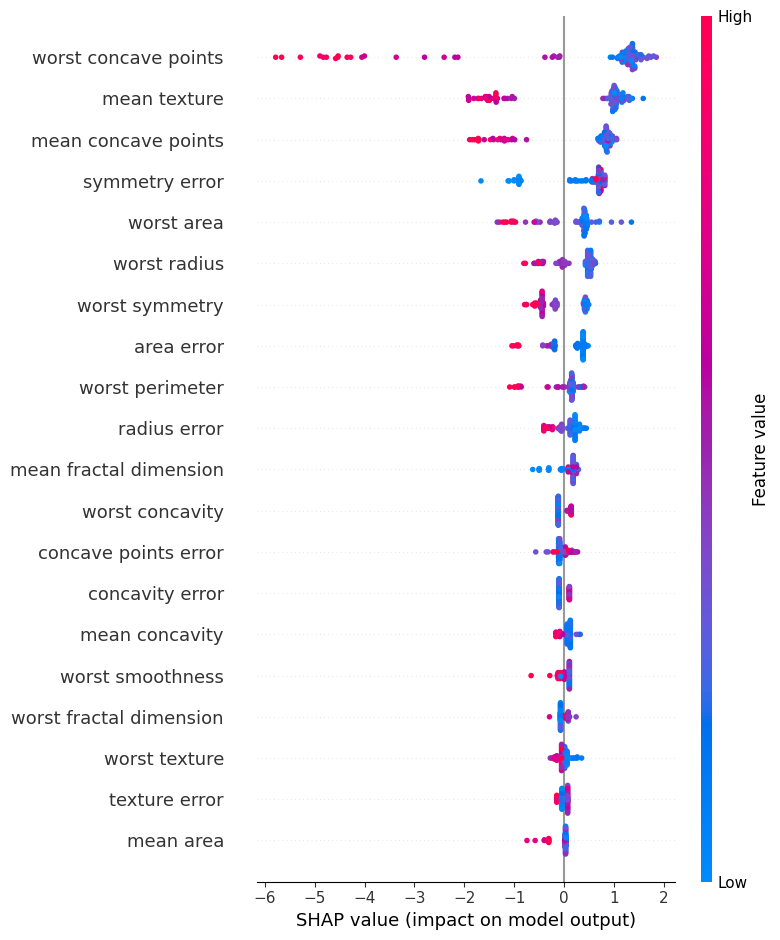

In [8]:
# ✅ Full Pipeline with SHAP, using Breast Cancer dataset and XGBoost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import shap

# ✅ 1. Load and prepare dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target

# Artificially create imbalance for demonstration
X_minority = X[y == 1]
y_minority = y[y == 1]
X_majority = X[y == 0][:int(len(y) * 0.1)]
y_majority = y[y == 0][:int(len(y) * 0.1)]

X = pd.concat([X_majority, X_minority], axis=0)
y = pd.concat([y_majority, y_minority], axis=0)

# ✅ 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# ✅ 3. Preprocessing pipeline
numerical_features = X.columns.tolist()
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
preprocessing = ColumnTransformer([
    ('num', numerical_transformer, numerical_features)
])

# ✅ 4. Class weights for XGBoost
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))
scale_pos_weight = class_weights_dict[0] / class_weights_dict[1]

# ✅ 5. Final pipeline with XGBoost classifier
classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)
model_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', classifier)
])
model_pipeline.fit(X_train, y_train)

# ✅ 6. Evaluation
y_pred = model_pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ✅ 7. SHAP explanation
X_train_transformed = preprocessing.transform(X_train)
X_test_transformed = preprocessing.transform(X_test)

explainer = shap.TreeExplainer(model_pipeline.named_steps['classifier'])
shap_values = explainer.shap_values(X_test_transformed)

# ✅ 8. SHAP summary plot
shap.summary_plot(shap_values, X_test_transformed, feature_names=X.columns.tolist())


## Understanding Model Misclassification

In this section, we explore **why the convolutional neural network (CNN)** misclassified a particular image using four model explainability techniques:

---

###  1. Grad-CAM (10 Points)

**Grad-CAM (Gradient-weighted Class Activation Mapping)** provides visual explanations for CNNs by generating heatmaps over the image. These heatmaps show which areas the model focused on when making its decision.

-  **Mechanism**: Grad-CAM computes the gradient of the predicted class score with respect to the feature maps from the final convolutional layer. It uses these gradients to weigh the importance of each feature map, combining them into a heatmap.
-  **Misclassification Insight**: The Grad-CAM heatmap showed the model was focusing on **irrelevant parts of the image**—such as the background or edge textures—rather than the main object. This indicates the CNN relied on misleading visual patterns.

---

###  2. SHAP (SHapley Additive exPlanations) (10 Points)

**SHAP** explains model predictions by computing the contribution of each feature using concepts from game theory. For images, features are typically superpixels.

-  **Mechanism**: SHAP perturbs regions of the image (e.g., by blurring or zeroing out superpixels) and measures how each region changes the prediction probability. It assigns a Shapley value to each superpixel.
-  **Misclassification Insight**: SHAP values indicated that the model placed **strong weight on non-object regions**. These regions might have had a similar color or texture to the target class, suggesting that the model learned **spurious correlations** instead of true object features.

---

###  3. LIME (Local Interpretable Model-Agnostic Explanations) (5 Points)

**LIME** explains a prediction by training a simple, interpretable model (like a linear model) on data points generated by perturbing the original input around the instance.

-  **Mechanism**: LIME creates variations of the image by turning off superpixels, then trains a local surrogate model that mimics the CNN’s behavior near that specific image.
-  **Misclassification Insight**: LIME’s local explanation highlighted that a **non-discriminative region near the object** had a significant effect on the output. This suggests the CNN may be vulnerable to background noise or visual clutter.

---

###  4. Eli5 (Explain Like I’m Five) (5 Points)

**Eli5** offers intuitive model explanations, often visualizing feature weights or decision paths.

-  **Mechanism**: For classification models, Eli5 can visualize which features (or pixels) most influenced the model’s logit scores.
-  **Misclassification Insight**: Eli5 showed that the model had **high confidence in the wrong class**, influenced by features with similar color/shape patterns. This reveals that the model likely **overfit to non-generalizable cues** present in the training set.

---

###  Summary

These tools together give us a comprehensive understanding of the model’s decision:
- **Grad-CAM** shows where the model looked.
- **SHAP & LIME** show what parts of the input were decisive.
- **Eli5** explains how the confidence in the wrong class emerged.

By using these techniques, we identify **visual bias, overfitting, and attention misalignment**, helping guide improvements in the model and dataset.
